# Imports

In [51]:
# %matplotlib widget
# from IPython.display import display, HTML
# display(HTML("<style>.container{width:100% !important;}</style>"))
from random import uniform, seed
from tabulate import tabulate
from numpy import argmax
import numpy as np
from dadk.QUBOSolverCPU import *
import matplotlib.pyplot as plt
import networkx as nx
from random import random
from busLinesQUBOMethods import *

# Initial data and restrictions

In [52]:
N, L, seed = 10, 3, 42
A = 1
B = [50,50,50,50,50,200] # Hay 6 restricciones, se puede cambiar el peso de cada una

"""
Las restricciones son:

1. toda parada tien al menos una salida
2. toda parada tiene al menos una llegada
3. Una parada no puede ir a sí misma
4. si una linea llega a j, tiene que salir de j
5. Cada linea debe ser cerrada y cubrir todos los nodos entre todas las paradas
6. Debe existir al menos un camino cerrado que pase por todos los nodos (grafo fuertemente conexo)

"""

'\nLas restricciones son:\n\n1. toda parada tien al menos una salida\n2. toda parada tiene al menos una llegada\n3. Una parada no puede ir a sí misma\n4. si una linea llega a j, tiene que salir de j\n5. Cada linea debe ser cerrada y cubrir todos los nodos entre todas las paradas\n6. Debe existir al menos un camino cerrado que pase por todos los nodos (grafo fuertemente conexo)\n\n'

# Generate graph and distances

Distancias promedio entre paradas:  5.204186691812141
Distancias entre paradas: 
╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ 9.88198 │ 9.55643 │ 7.58795 │ 6.38793 │ 2.40417 │ 2.40395 │ 1.52275 │ 8.79559 │ 6.41004 │ 7.37265 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1.18526 │ 9.88198 │ 8.49198 │ 2.91105 │ 2.63642 │ 2.65064 │ 3.73818 │ 5.72281 │ 4.88751 │ 3.62106 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 6.50668 │ 2.25544 │ 9.88198 │ 4.29726 │ 5.10463 │ 8.06658 │ 2.79706 │ 5.62811 │ 6.33173 │ 1.41805 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 6.4679  │ 2.53472 │ 1.58546 │ 9.88198 │ 9.69069 │ 8.27558 │ 3.74152 │ 1.87905 │ 7.1581  │ 4.96137 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│

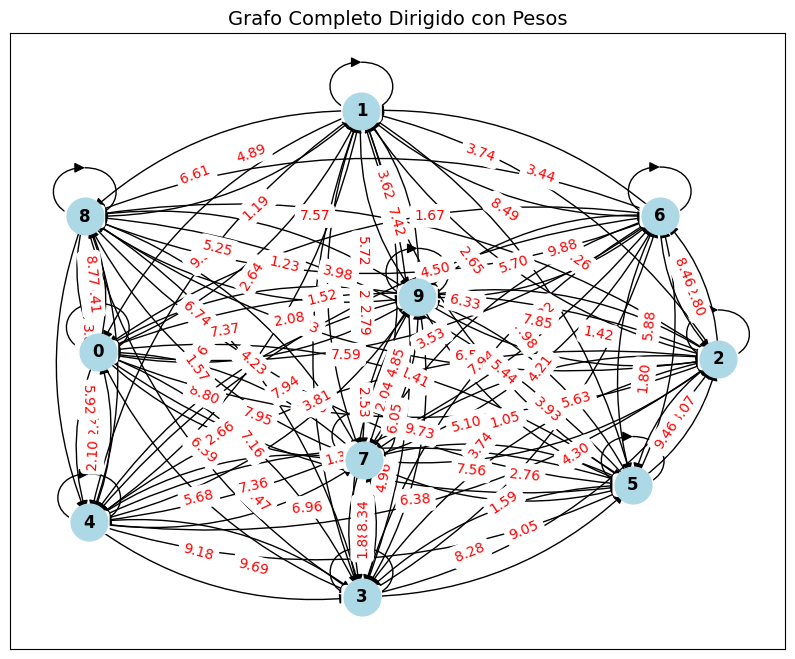

In [53]:
# Crear grafo y matriz de distancias
graph, distances = create_complete_graph(N, seed, zeroSelfDistance=False)
averageDistances = average_distance_between_stops(distances, N)
print("Distancias promedio entre paradas: ", averageDistances)
print("Distancias entre paradas: ")
print(tabulate(distances, tablefmt="fancy_grid"))
draw_graph(graph)

# Read graph from file 

In [54]:
distances = np.genfromtxt('adjac_matrix')
distances = distances[0:N,0:N]
graph = nx.from_numpy_array(distances)
nodes = graph.nodes()
draw_graph(graph)

FileNotFoundError: adjac_matrix not found.

# Create QUBO

In [ ]:
# Crear QUBO
H_distances, H_constraints, HQ = build_qubo(graph, distances, N, L, A, B)
print("H_distances = ", H_distances, "\nH_constraints = ", H_constraints, "\nHQ = ", HQ)

H_distances =  4.4963 x_3 + 4.4963 x_4 + 4.4963 x_5 + 3.0176 x_6 + 3.0176 x_7 + 3.0176 x_8 + 2.7748000000000004 x_9 + 2.7748000000000004 x_10 + 2.7748000000000004 x_11 + 6.8581 x_12 + 6.8581 x_13 + 6.8581 x_14 + 3.6111999999999997 x_15 + 3.6111999999999997 x_16 + 3.6111999999999997 x_17 + 3.3162 x_18 + 3.3162 x_19 + 3.3162 x_20 + 2.3959 x_21 + 2.3959 x_22 + 2.3959 x_23 + 3.2778 x_24 + 3.2778 x_25 + 3.2778 x_26 + 7.5956 x_27 + 7.5956 x_28 + 7.5956 x_29 + 3.2066 x_30 + 3.2066 x_31 + 3.2066 x_32 + 4.8013 x_36 + 4.8013 x_37 + 4.8013 x_38 + 5.0486 x_39 + 5.0486 x_40 + 5.0486 x_41 + 3.3465 x_42 + 3.3465 x_43 + 3.3465 x_44 + 2.3281 x_45 + 2.3281 x_46 + 2.3281 x_47 + 4.307300000000001 x_48 + 4.307300000000001 x_49 + 4.307300000000001 x_50 + 4.298 x_51 + 4.298 x_52 + 4.298 x_53 + 2.4181 x_54 + 2.4181 x_55 + 2.4181 x_56 + 4.084 x_57 + 4.084 x_58 + 4.084 x_59 + 3.1898 x_60 + 3.1898 x_61 + 3.1898 x_62 + 4.5362 x_63 + 4.5362 x_64 + 4.5362 x_65 + 2.1341 x_69 + 2.1341 x_70 + 2.1341 x_71 + 6.898 x_72 

# Solve

In [ ]:
solver = QUBOSolverCPU(
    number_iterations=500000,  # Aumentar iteraciones
    number_runs=32,  # Aumentar el número de corridas
    scaling_bit_precision=32,
    auto_tuning=AutoTuning.AUTO_SCALING_AND_SAMPLING
)
solution_list = solver.minimize(HQ)

print(solution_list.solver_times)


********************************************************************************
Scaling qubo, temperature_start, temperature_end and offset_increase_rate
  factor:                      1342043.00000
********************************************************************************


********************************************************************************
Effective values (including scaling factor)
  temperature_start:           375200000.000
  temperature_end:              61860000.000
  offset_increase_rate:        157000000.000
  duration:                            0.022 sec
********************************************************************************

+--------------+----------------------------+----------------------------+----------------+
| time         | from                       | to                         | duration       |
|--------------+----------------------------+----------------------------+----------------|
| anneal       | 2025-01-30 17:22:09.378562 | 202

In [48]:
# Procesar solución
active_edges, colors = prep_bus_solution(HQ, H_distances, H_constraints, solution_list, N, L)

HQ  = 28162.673600
H_distances =  62.673600
H_constraints = 28100.000000


# Visualize

Number of nodes:          10
Number of lines:           3
Number of edges:          45
Active edges:             18
Active edges details:  [(0, 1, 0), (0, 3, 1), (1, 5, 0), (1, 7, 1), (2, 0, 1), (2, 6, 0), (3, 8, 1), (4, 9, 2), (5, 2, 0), (5, 7, 2), (6, 1, 0), (6, 8, 2), (7, 2, 1), (7, 6, 2), (8, 0, 1), (8, 9, 2), (9, 4, 2), (9, 5, 0)]
Feasibility Check:     Error: Nodo 0 tiene salida en la línea 0 pero no recibe ningún autobús.



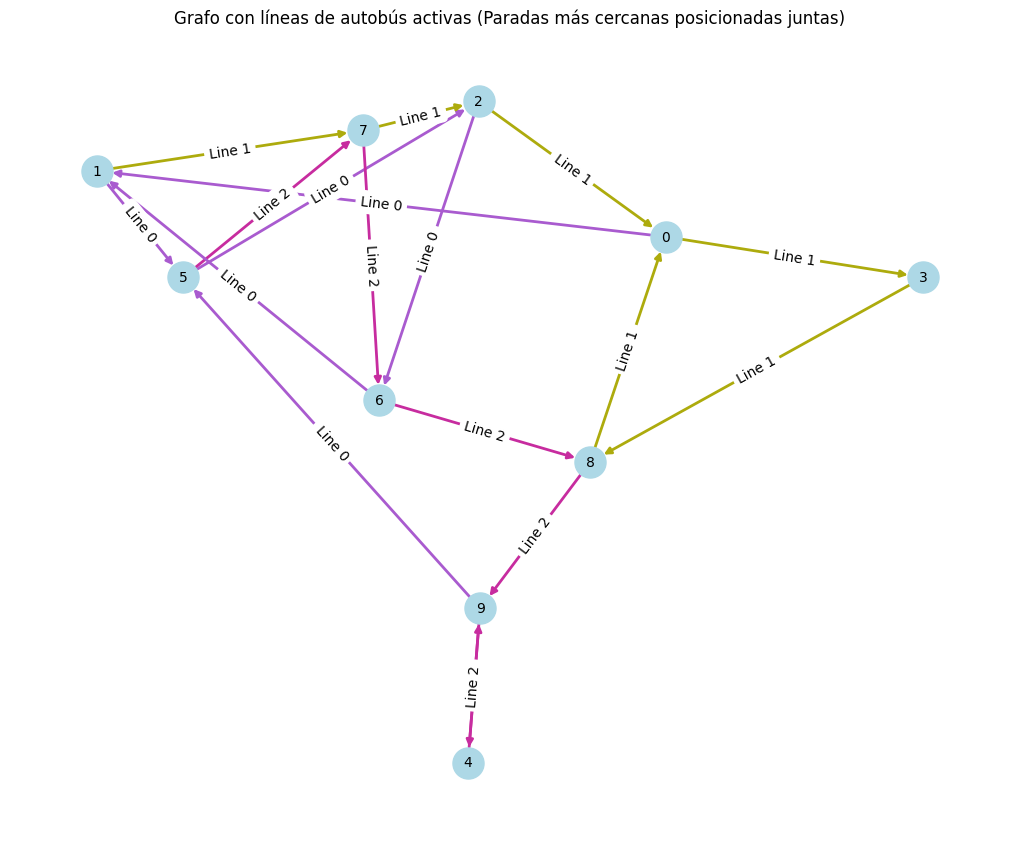

In [49]:
# Reporte y visualización
report_bus_solution(N, L, graph, active_edges)
draw_bus_graph(graph, active_edges, colors, distances)

In [50]:
import os
def adjacency_matrix_for_line(N, active_edges, line):
    # Crear una matriz de adyacencia vacía
    adjacency_matrix = np.zeros((N, N), dtype=int)
    
    # Rellenar la matriz de adyacencia para la línea especificada
    for i, j, l in active_edges:
        if l == line:
            adjacency_matrix[i, j] = 1
    
    return adjacency_matrix

adj_matrix = adjacency_matrix_for_line(N, active_edges, 1)
for i in range(L):
    np.savetxt(os.path.join(os.pardir, "results", f"Line{i}.dat"), adjacency_matrix_for_line(N, active_edges, i))
print(tabulate(adj_matrix, tablefmt="fancy_grid"))

╒═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 0 │ 0 │ 0 │ 1 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 1 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 1 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 1 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╛
